# **Seilvy Kusumah D.A		    (23031554034)**
# **Shellomitha Sulvana Dewi	(23031554096)**
# **Saira Nashwa Ramadhani	  (23031554237)**

# **KELOMPOK 12 2023 D**


**Ambil Link Trailer dengan menggunakan API TMDB**

In [ ]:
import pandas as pd
import requests
import time

# === API Key TMDB ===
API_KEY = 'c5d4b86f400fcb3a3659c0c20b8df857'

# === Baca dataset ===
df = pd.read_csv('/content/tmdb_5000_movies.csv')

# === Fungsi ambil URL trailer dari TMDb ===
def get_trailer_url(movie_id, api_key):
    url = f"https://api.themoviedb.org/3/movie/{movie_id}/videos?api_key={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        for video in data.get('results', []):
            if video.get('type') == 'Trailer' and video.get('site') == 'YouTube':
                return f"https://www.youtube.com/watch?v={video.get('key')}"
        return None
    except Exception as e:
        print(f"Error fetching trailer for movie_id {movie_id}: {e}")
        return None

# === Ambil semua trailer ===
trailer_links = []
for i, movie_id in enumerate(df['id']):
    url = get_trailer_url(movie_id, API_KEY)
    trailer_links.append(url)
    print(f"{i+1}/{len(df)} | ID: {movie_id} | URL: {url}")
    time.sleep(0.25)  # Hindari rate limit

# === Tambahkan ke dataframe dan simpan ===
df['trailer_url'] = trailer_links
df.to_csv('tmdb_movies_with_trailers.csv', index=False)
print(" Selesai. File disimpan sebagai 'tmdb_movies_with_trailers.csv'")


1/4803 | ID: 19995 | URL: https://www.youtube.com/watch?v=jm2sNLIPPvA
2/4803 | ID: 285 | URL: https://www.youtube.com/watch?v=HKSZtp_OGHY
3/4803 | ID: 206647 | URL: https://www.youtube.com/watch?v=z4UDNzXD3qA
4/4803 | ID: 49026 | URL: https://www.youtube.com/watch?v=GAjBzu8ggi0
5/4803 | ID: 49529 | URL: https://www.youtube.com/watch?v=WR6HUkzxjR0
6/4803 | ID: 559 | URL: https://www.youtube.com/watch?v=wPosLpgMtTY
7/4803 | ID: 38757 | URL: https://www.youtube.com/watch?v=gsYKF8ecC8g
8/4803 | ID: 99861 | URL: https://www.youtube.com/watch?v=JAUoeqvedMo
9/4803 | ID: 767 | URL: https://www.youtube.com/watch?v=DgeDDXcw--I
10/4803 | ID: 209112 | URL: https://www.youtube.com/watch?v=s9EkdAHqtvU
11/4803 | ID: 1452 | URL: https://www.youtube.com/watch?v=zVCozSQj8TQ
12/4803 | ID: 10764 | URL: https://www.youtube.com/watch?v=BBqYaFEWBxI
13/4803 | ID: 58 | URL: https://www.youtube.com/watch?v=9SFWn9taQTw
14/4803 | ID: 57201 | URL: https://www.youtube.com/watch?v=LoVhgaj6PiE
15/4803 | ID: 49521 | U

**Ambil kolom sinopsis, Revenue, trailer url**

In [ ]:
import pandas as pd

# Baca file dataset yang sudah ada trailer URL-nya
df = pd.read_csv('/content/tmdb_movies_with_trailers.csv')

# Ambil hanya kolom overview, revenue, trailer_url
df_sederhana = df[['overview', 'revenue', 'trailer_url']].dropna()

df_sederhana.to_csv('film_sinopsis_revenue_trailer.csv', index=False)

print("Berhasil disimpan ke 'film_sinopsis_revenue_trailer.csv'")


Berhasil disimpan ke 'film_sinopsis_revenue_trailer.csv'


**Membuat label apakah film tersebut laris atau tidak dengan median revenue**

In [ ]:
import pandas as pd

# Baca data
df = pd.read_csv('/content/film_sinopsis_revenue_trailer.csv')

# Gunakan quantile (persentil) untuk menentukan batas
q1 = df['revenue'].quantile(1/3)
q2 = df['revenue'].quantile(2/3)

# Fungsi klasifikasi berdasarkan quantile
def klasifikasi_revenue(x):
    if x <= q1:
        return 'tidak laris'
    elif x <= q2:
        return 'sedang'
    else:
        return 'laris'

df['label_laris'] = df['revenue'].apply(klasifikasi_revenue)

# Simpan ke file
df.to_csv('film_laris_final_3label.csv', index=False)

print("Label 3 kelas berdasarkan distribusi berhasil dibuat dan disimpan ke 'film_laris_final_3label.csv'")


Label 3 kelas berdasarkan distribusi berhasil dibuat dan disimpan ke 'film_laris_final_3label.csv'


# **Pre processing**

cek ada nilai null atau tidak





In [ ]:
import pandas as pd

df = pd.read_csv('/content/film_laris_final_3label.csv')

# Cek kolom yang tersedia
print(df.columns)

# Cek ada null tidak
print(df[['overview', 'trailer_url', 'label_laris']].isnull().sum())

# Hapus baris yang ada nilai null
df_clean = df.dropna(subset=['overview', 'trailer_url', 'label_laris'])

# Simpan ulang hasil yang sudah bersih
df_clean.to_csv('film_clean.csv', index=False)

print("Data siap untuk diproses ke tahap download trailer")


Index(['overview', 'revenue', 'trailer_url', 'label_laris'], dtype='object')
overview       0
trailer_url    0
label_laris    0
dtype: int64
Data siap untuk diproses ke tahap download trailer


Untuk kolom sinopsis

In [ ]:
import pandas as pd
import re

# Fungsi preprocessing sederhana
def preprocess_text_simple(text):
    if pd.isnull(text):
        return ''

    text = text.lower()  # Mengubah teks menjadi lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Menghapus angka dan simbol

    # Pisahkan teks menjadi kata-kata
    words = text.split()

    return ' '.join(words)

# Misalnya kita load dataset
df = pd.read_csv('film_clean.csv')

# Terapkan preprocessing pada kolom 'overview'
df['processed_overview'] = df['overview'].apply(preprocess_text_simple)

# Cek hasil preprocessing
print(df[['overview', 'processed_overview']].head())

# Simpan ke CSV
df.to_csv('film_preprocessed_simple.csv', index=False)


                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                  processed_overview  
0  in the nd century a paraplegic marine is dispa...  
1  captain barbossa long believed to be dead has ...  
2  a cryptic message from bonds past sends him on...  
3  following the death of district attorney harve...  
4  john carter is a warweary former military capt...  


Mengonversi Teks dengan Bag of Words

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Baca dataset
df = pd.read_csv('/content/film_preprocessed_simple.csv')

# Pastikan tidak ada nilai kosong di kolom sinopsis
df['processed_overview'] = df['processed_overview'].fillna('no description')

# Buat vectorizer untuk Bag of Words
bow_vectorizer = CountVectorizer(max_features=5000)  # Ambil 5000 kata paling sering muncul

# Ubah teks menjadi fitur numerik
X_bow = bow_vectorizer.fit_transform(df['processed_overview'])

# Konversi hasil menjadi array
X_bow = X_bow.toarray()

# Tampilkan bentuk hasil BoW
print(f"Bentuk hasil BoW: {X_bow.shape}")


Bentuk hasil BoW: (4509, 5000)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Baca dataset
df = pd.read_csv('/content/film_preprocessed_simple.csv')

# Pastikan tidak ada nilai kosong
df['processed_overview'] = df['processed_overview'].fillna('no description')

# Buat vectorizer BoW
bow_vectorizer = CountVectorizer(max_features=5000)

# Ubah teks menjadi fitur numerik
X_bow = bow_vectorizer.fit_transform(df['processed_overview'])

# Konversi ke array dan ke DataFrame agar bisa disimpan
X_bow_array = X_bow.toarray()
bow_feature_names = bow_vectorizer.get_feature_names_out()
X_bow_df = pd.DataFrame(X_bow_array, columns=bow_feature_names)

# Simpan ke file CSV
X_bow_df.to_csv('X_bow.csv', index=False)

print("Hasil BoW berhasil disimpan ke 'X_bow.csv'")


Hasil BoW berhasil disimpan ke 'X_bow.csv'


In [ ]:
from sklearn.model_selection import train_test_split

# Gunakan hasil BoW sebagai fitur
X = X_bow  # Asumsikan X_bow sudah dihitung sebelumnya
y = df['label_laris']  # Target label

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Tampilkan info data
print(f'Jumlah data total   : {X.shape[0]}')
print(f'Jumlah data training: {X_train.shape[0]}')
print(f'Jumlah data testing : {X_test.shape[0]}')

# Tampilkan beberapa contoh
print("\nContoh data X_train (BoW):")
print(X_train[:3])  # 3 contoh data fitur

print("\nContoh label y_train:")
print(y_train[:3].values)  # 3 contoh label


Jumlah data total   : 4509
Jumlah data training: 3607
Jumlah data testing : 902

Contoh data X_train (BoW):
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 105 stored elements and shape (3, 5000)>
  Coords	Values
  (0, 2203)	1
  (0, 4417)	2
  (0, 2322)	2
  (0, 4493)	3
  (0, 177)	2
  (0, 339)	1
  (0, 3082)	1
  (0, 594)	1
  (0, 4881)	1
  (0, 2071)	1
  (0, 4874)	1
  (0, 3148)	1
  (0, 2043)	1
  (0, 1858)	1
  (0, 7)	1
  (0, 3105)	1
  (0, 4986)	1
  (0, 4598)	1
  (0, 4616)	1
  (0, 1439)	1
  (0, 1081)	2
  (0, 2602)	1
  (0, 2383)	2
  (0, 263)	1
  (0, 1845)	1
  :	:
  (2, 177)	2
  (2, 172)	2
  (2, 3082)	1
  (2, 4920)	1
  (2, 3014)	1
  (2, 1831)	1
  (2, 4839)	1
  (2, 4421)	1
  (2, 2288)	1
  (2, 3980)	1
  (2, 4688)	1
  (2, 1723)	1
  (2, 1353)	1
  (2, 1640)	1
  (2, 1491)	1
  (2, 4643)	1
  (2, 4523)	1
  (2, 2693)	1
  (2, 4521)	1
  (2, 1727)	1
  (2, 4139)	1
  (2, 3809)	1
  (2, 4428)	1
  (2, 662)	1
  (2, 794)	1

Contoh label y_train:
['tidak laris' 'laris' 'laris']


In [ ]:
y = df['label_laris']

# Tampilkan bentuk data
print(f'Bentuk fitur X : {X.shape}')  # (jumlah_data, jumlah_kata_fitur)
print(f'Bentuk target y: {y.shape}')   # (jumlah_data,)

Bentuk fitur X : (4509, 5000)
Bentuk target y: (4509,)


Memisahkan Data Menjadi Fitur dan Target

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi train dan test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f'Jumlah data training: {X_train.shape[0]}')
print(f'Jumlah data testing : {X_test.shape[0]}')


Jumlah data training: 3607
Jumlah data testing : 902


Trailer film

In [ ]:
pip install pandas pytube


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.7 MB/s eta 0:00:00


thumbnail dari trailer film

In [ ]:
import pandas as pd
import requests
import os

# Buat folder untuk simpan thumbnail
os.makedirs("thumbnails", exist_ok=True)

# Baca file CSV
df = pd.read_csv("tmdb_movies_with_trailers.csv")

# Fungsi untuk ambil thumbnail URL dari trailer YouTube
def get_thumbnail_url(youtube_url):
    if pd.isna(youtube_url):
        return None
    if 'v=' in youtube_url:
        video_id = youtube_url.split('v=')[1]
    elif 'youtu.be/' in youtube_url:
        video_id = youtube_url.split('youtu.be/')[1]
    else:
        return None
    return f'https://img.youtube.com/vi/{video_id}/0.jpg'  # Thumbnail default resolusi 480x360

# Unduh dan simpan semua thumbnail
for idx, row in df.iterrows():
    youtube_url = row['trailer_url']
    thumbnail_url = get_thumbnail_url(youtube_url)
    if thumbnail_url:
        try:
            response = requests.get(thumbnail_url, timeout=10)
            if response.status_code == 200:
                with open(f'thumbnails/thumbnail_{idx}.jpg', 'wb') as f:
                    f.write(response.content)
                print(f"[{idx}] Thumbnail downloaded.")
            else:
                print(f"[{idx}] Failed to download: HTTP {response.status_code}")
        except Exception as e:
            print(f"[{idx}] Error downloading: {e}")
    else:
        print(f"[{idx}] No valid YouTube URL.")


[0] Thumbnail downloaded.
[1] Thumbnail downloaded.
[2] Thumbnail downloaded.
[3] Thumbnail downloaded.
[4] Thumbnail downloaded.
[5] Thumbnail downloaded.
[6] Thumbnail downloaded.
[7] Thumbnail downloaded.
[8] Thumbnail downloaded.
[9] Thumbnail downloaded.
[10] Thumbnail downloaded.
[11] Thumbnail downloaded.
[12] Thumbnail downloaded.
[13] Thumbnail downloaded.
[14] Thumbnail downloaded.
[15] Thumbnail downloaded.
[16] Thumbnail downloaded.
[17] Thumbnail downloaded.
[18] Thumbnail downloaded.
[19] Thumbnail downloaded.
[20] Thumbnail downloaded.
[21] Thumbnail downloaded.
[22] Thumbnail downloaded.
[23] Thumbnail downloaded.
[24] Thumbnail downloaded.
[25] Thumbnail downloaded.
[26] Thumbnail downloaded.
[27] Thumbnail downloaded.
[28] Thumbnail downloaded.
[29] Thumbnail downloaded.
[30] Thumbnail downloaded.
[31] Thumbnail downloaded.
[32] Thumbnail downloaded.
[33] Thumbnail downloaded.
[34] Thumbnail downloaded.
[35] Thumbnail downloaded.
[36] Thumbnail downloaded.
[37] Thumbn

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

thumbnail_dir = 'thumbnails'
features = []

for i in tqdm(range(len(os.listdir(thumbnail_dir)))):
    img_path = os.path.join(thumbnail_dir, f'thumbnail_{i}.jpg')
    if not os.path.exists(img_path):
        features.append(np.zeros(64*64*3))
        continue
    try:
        image = load_img(img_path, target_size=(64, 64))  # resolusi kecil
        image = img_to_array(image)
        feature = image.flatten()
        features.append(feature)
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        features.append(np.zeros(64*64*3))

features_array = np.array(features)
print("Selesai mengekstrak fitur RGB mentah. Shape:", features_array.shape)

np.save('thumbnail_rgb_features_64.npy', features_array)


100%|██████████| 4417/4417 [00:09<00:00, 450.97it/s]


Selesai mengekstrak fitur RGB mentah. Shape: (4417, 12288)


#  **Hasil Gabungan BoW Sinopsis & fitur visual thumbnail**

hanya menggunakan film yang terdapat sinopsis dan trailer

In [ ]:
print("Bag of Words shape:", X_bow.shape)
print("thumbnail_features:", np.array(features))

Bag of Words shape: (4509, 5000)
thumbnail_features: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler

# Load dan bersihkan data utama
df = pd.read_csv('/film_preprocessed_simple.csv')

# Hapus baris dengan sinopsis kosong
df = df.dropna(subset=['processed_overview']).reset_index(drop=True)

#  Ubah label string menjadi angka
# Tampilkan label unik dulu
print("Label unik:", df['label_laris'].unique())

# Mapping label string ke angka
label_map = {'tidak laris': 0, 'sedang': 1, 'laris': 2}  # ubah sesuai kategori yang ada
df['label_laris'] = df['label_laris'].map(label_map)

#  Load fitur eksternal
# Fitur teks (Bag of Words)
bow_features_all = pd.read_csv('/content/X_bow.csv').values  # convert ke numpy array

# Fitur visual (RGB thumbnail)
thumbnail_features_all = np.load('thumbnail_rgb_features_64.npy', allow_pickle=True)

# Sinkronisasi jumlah data
min_len = min(len(df), len(bow_features_all), len(thumbnail_features_all))
df = df.iloc[:min_len].reset_index(drop=True)
bow_features = bow_features_all[:min_len]

# Pastikan thumbnail jadi array 2D
thumbnail_features_all = np.array([np.array(f).flatten() for f in thumbnail_features_all])
thumbnail_features = thumbnail_features_all[:min_len]

#  Gabungkan fitur teks dan visual
X = np.concatenate([bow_features, thumbnail_features], axis=1).astype(np.float32)
y = df['label_laris'].values[:min_len].astype(np.int64)

#  Oversampling untuk seimbangkan data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Bagi data train dan test ===
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

print("Train data shape:", X_train.shape)
print("Test data shape :", X_test.shape)

print("Jumlah data setelah sinkronisasi:", min_len)
print("Shape fitur gabungan:", X.shape)
print("Shape fitur setelah resampling:", X_resampled.shape)
print("Distribusi label setelah resampling:", np.bincount(y_resampled))


Label unik: ['laris' 'tidak laris' 'sedang']
Train data shape: (3607, 17288)
Test data shape : (902, 17288)
Jumlah data setelah sinkronisasi: 4417
Shape fitur gabungan: (4417, 17288)
Shape fitur setelah resampling: (4509, 17288)
Distribusi label setelah resampling: [1503 1503 1503]


## Membagi data train & test

In [ ]:
from sklearn.model_selection import train_test_split

# X dan y sudah diasumsikan didefinisikan sebelumnya (fitur gabungan dan label numerik)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Cek bentuk data
print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Train data shape: (3533, 17288)
Test data shape: (884, 17288)


## **Lati model**

**Random Forest**

Akurasi (Accuracy): 0.3756
Precision: 0.3741
Recall: 0.3756
F1-score: 0.3739
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.35      0.30      0.32       273
           1       0.38      0.39      0.39       294
           2       0.39      0.42      0.41       317

    accuracy                           0.38       884
   macro avg       0.37      0.37      0.37       884
weighted avg       0.37      0.38      0.37       884



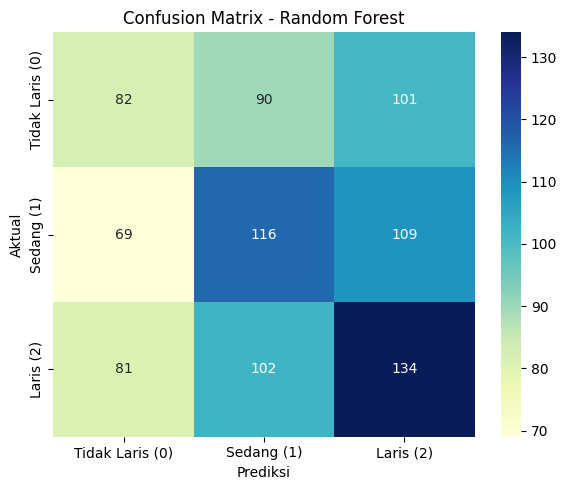

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi & latih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_rf = rf_model.predict(X_test)

# Evaluasi: Akurasi
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi (Accuracy): {accuracy:.4f}")

# Precision, Recall, F1-score untuk multiclass
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Classification Report
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Visualisasi Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Ganti label ini sesuai jumlah kelas dan label sebenarnya di data kamu
labels = ['Tidak Laris (0)', 'Sedang (1)', 'Laris (2)']  # contoh untuk 3 kelas

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()


XGBOOST

Training XGBoost...
Training selesai.
Akurasi: 0.3722

Classification Report:
              precision    recall  f1-score   support

       laris       0.43      0.46      0.45       317
      sedang       0.33      0.29      0.31       294
 tidak laris       0.35      0.36      0.35       273

    accuracy                           0.37       884
   macro avg       0.37      0.37      0.37       884
weighted avg       0.37      0.37      0.37       884



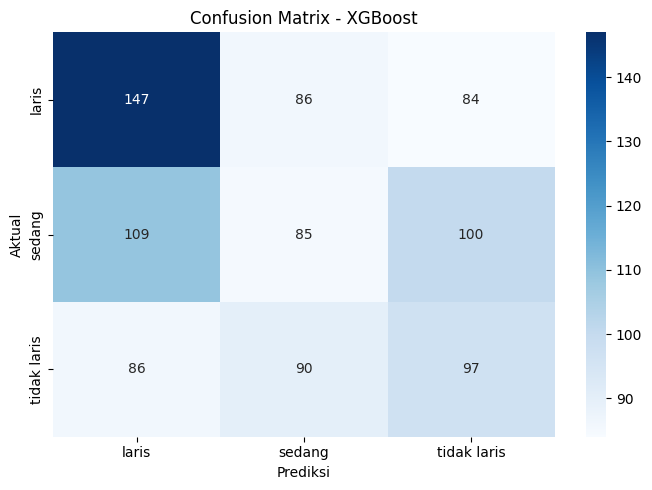

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode label string ke angka
le = LabelEncoder()
y_encoded = le.fit_transform(df['label_laris'][:min_len])

# Lanjut pake y_encoded untuk training
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Inisialisasi dan latih model XGBoost
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    n_estimators=20,
    random_state=42,
    n_jobs=-1
)

print("Training XGBoost...")
xgb_model.fit(X_train, y_train, verbose=1)
print("Training selesai.")

# Prediksi
y_pred = xgb_model.predict(X_test)

print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - XGBoost')
plt.tight_layout()
plt.show()
